In [ ]:
# General


In [5]:
a = 4
b = 3
print(a+b)

7


In [ ]:
import matplotlib.pyplot

In [6]:
a+b

7

In [3]:
a*b

12

In [4]:
a ** b

64

In [5]:
a = 11
b= 4

In [9]:
int(a / b)

2

In [1]:
c = 'Hello World!!!'

In [4]:
c + ' My name is Kirill'

'Hello World!!! My name is Kirill'

In [12]:
(11 == a) | (b == 3)

True

In [15]:
if (11 == a) & (b == 3):
    print(a)
else:
    a=12
    b=6
    print(a / b)

2.0


In [30]:
range(len(a))

range(0, 5)

In [23]:
a = [4,8,15,34,32]

In [32]:
for i in range(len(a)-1):
    val = a[i]
    print(i, val)

0 4
1 8
2 15
3 34


In [10]:
for i in range(b):
    print(i)

0
1
2
3


In [11]:
list = [4,  8, 15, 24, 32]

In [12]:
for i in list:
    print(i)

4
8
15
24
32


In [13]:
list.append(b)
list

[4, 8, 15, 24, 32, 4]

In [14]:
list.pop?

Signature: list.pop(index=-1, /)
Docstring:
Remove and return item at index (default last).

Raises IndexError if list is empty or index is out of range.
Type:      builtin_function_or_method


https://pythonworld.ru/tipy-dannyx-v-python/slovari-dict-funkcii-i-metody-slovarej.html

In [15]:
dict = {}
dict['first_name'] = 'Kirill'
dict['last_name'] = 'Fomenko'
employers = {}
employers['employer1'] = dict
employer2 = {'first_name':'Igor','last_name':'Abrashin'}
employers['employer2'] = employer2
employers

{'employer1': {'first_name': 'Kirill', 'last_name': 'Fomenko'},
 'employer2': {'first_name': 'Igor', 'last_name': 'Abrashin'}}

# NumPy

In [37]:
import numpy as np

In [38]:
np.array(a)

array([ 4,  8, 15, 34, 32, 67])

In [33]:
a.append(67)
a

[4, 8, 15, 34, 32, 67]

In [39]:
array= np.array(a)
array 

array([ 4,  8, 15, 34, 32, 67])

In [52]:
array.argmax()

5

In [53]:
np.median(array)

23.5

In [54]:
np.argmax(array)

5

# Pandas

In [55]:
import pandas as pd

In [57]:
s = pd.Series(a)

In [70]:
s

0     4
1     8
2    15
3    34
4    32
5    67
dtype: int64

In [75]:
s[-4:]

2    15
3    34
4    32
5    67
dtype: int64

In [68]:
s[-2:-1]

4    32
dtype: int64

In [79]:
df = pd.DataFrame([[2,6],[3,8],[5,9]], columns=['c1','c2'], index=['Иван','Алексей', 'Михаил'])
df

,c1,c2
Иван,2,6
Алексей,3,8
Михаил,5,9


In [92]:
for each in df.iterrows():
    print(each[0])

Иван
Алексей
Михаил


In [85]:
df.loc['Алексей','c2']

8

In [86]:
df.iloc[0,0]

2

In [25]:
df.iloc[1,0]

3

In [26]:
!ls

lesson01.ipynb	lesson03.ipynb	lesson05.ipynb	lesson07.ipynb
lesson02.ipynb	lesson04.ipynb	lesson06.ipynb	lesson08.ipynb


In [94]:
df = pd.read_csv('../data/bank.csv')

In [95]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [105]:
df.tail(5).head(3)[['Surname','Age']]

,Surname,Age
9995,Obijiaku,39
9996,Johnstone,35
9997,Liu,36


In [106]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


### groupby

In [32]:
df.groupby('Geography').agg({'Balance':['min','max','median'],'EstimatedSalary':['min','max','mean']})

Balance                       EstimatedSalary             \
                min        max     median             min        max   
Geography                                                              
France         0.00  238387.56   62153.50           90.07  199929.17   
Germany    27288.43  214346.96  119703.10           11.58  199970.74   
Spain          0.00  250898.09   61710.44          417.41  199992.48   

                          
                    mean  
Geography                 
France      99899.180814  
Germany    101113.435102  
Spain       99440.572281

### crosstab

In [33]:
pd.crosstab(df['Gender'],df['Geography'], normalize=True)

Geography,France,Germany,Spain
Gender,,,
Female,0.2261,0.1193,0.1089
Male,0.2753,0.1316,0.1388


In [34]:
df['EstimatedSalary'].quantile(.75)

149388.2475

In [35]:
q75 = df['EstimatedSalary'].quantile(.75)
q75

149388.2475

In [36]:
df['isRich'] = df['EstimatedSalary'] > q75

In [37]:
df['isRich']

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: isRich, Length: 10000, dtype: bool

In [38]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0,False


In [39]:
df[(df['Exited'] == 1) | (df['isRich'])]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,False
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,False
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1,True
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1,False
13,14,15691483,Chin,549,France,Female,25,5.0,0.00,2,0,0,190857.79,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4.0,88381.21,1,1,0,69384.71,1,False
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0,True
9994,9995,15719294,Wood,800,France,Female,29,2.0,0.00,2,0,0,167773.55,0,True
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1,False


In [40]:
df.loc[(df['isRich'] == True) & ((df['Geography'] == 'France') | (df['Geography'] == 'Spain'))]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1,True
13,14,15691483,Chin,549,France,Female,25,5.0,0.00,2,0,0,190857.79,0,True
18,19,15661507,Muldrow,587,Spain,Male,45,6.0,0.00,1,0,0,158684.81,0,True
20,21,15577657,McDonald,732,France,Male,41,8.0,0.00,2,1,1,170886.17,0,True
24,25,15625047,Yen,846,France,Female,38,5.0,0.00,1,1,1,187616.16,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9978,9979,15703563,P'eng,774,France,Male,40,9.0,93017.47,2,1,0,191608.97,0,True
9983,9984,15656710,Cocci,613,France,Male,40,4.0,0.00,1,0,0,151325.24,0,True
9989,9990,15605622,McMillan,841,Spain,Male,28,4.0,0.00,2,1,1,179436.60,0,True
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2.0,0.00,1,1,0,195192.40,0,True


In [41]:
df['Gender'] = df['Gender'].apply(lambda x: 0 if x=='Male' else 1)

In [42]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,1,15634602,Hargrave,619,France,1,42,2.0,0.00,1,1,1,101348.88,1,False
1,2,15647311,Hill,608,Spain,1,41,1.0,83807.86,1,0,1,112542.58,0,False
2,3,15619304,Onio,502,France,1,42,8.0,159660.80,3,1,0,113931.57,1,False
3,4,15701354,Boni,699,France,1,39,1.0,0.00,2,0,0,93826.63,0,False
4,5,15737888,Mitchell,850,Spain,1,43,2.0,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,0,39,5.0,0.00,2,1,0,96270.64,0,False
9996,9997,15569892,Johnstone,516,France,0,35,10.0,57369.61,1,1,1,101699.77,0,False
9997,9998,15584532,Liu,709,France,1,36,7.0,0.00,1,0,1,42085.58,1,False
9998,9999,15682355,Sabbatini,772,Germany,0,42,3.0,75075.31,2,1,0,92888.52,1,False


In [43]:
def calculate(x):
    return 0 if x=='Male' else 1

In [44]:
calculate('Male')

0

In [45]:
df['Gender'].apply(calculate)

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Gender, Length: 10000, dtype: int64

In [46]:
d = {1: 'has', 0: 'not has'}
df['HasCrCard'].map(d).head(10)

0        has
1    not has
2        has
3    not has
4        has
5        has
6        has
7        has
8    not has
9        has
Name: HasCrCard, dtype: object

In [47]:
df['Geography'].value_counts()['Germany']

2509

In [48]:
pd.crosstab(df['Exited'], df['HasCrCard'], normalize= True)

HasCrCard,0,1
Exited,,
0,0.2332,0.5631
1,0.0613,0.1424


<AxesSubplot:>

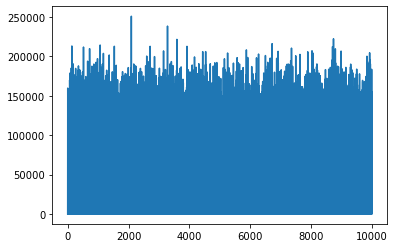

In [49]:
df['Balance'].plot()

In [50]:
# !conda install seaborn
# pip install seaborn
import seaborn as sns

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

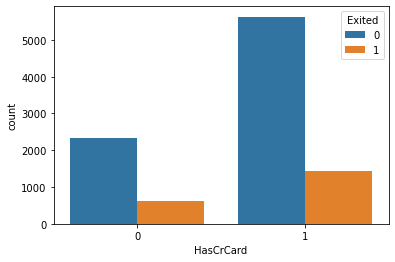

In [51]:
sns.countplot(x="HasCrCard", hue='Exited', data= df)

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

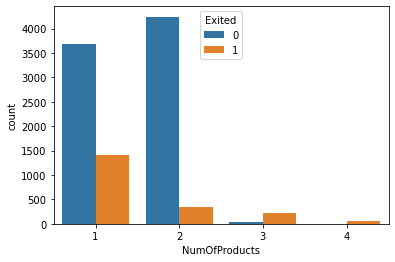

In [52]:
sns.countplot(x="NumOfProducts", hue='Exited', data= df)

In [53]:
a = [4,8,15,16,23,42]
print(a)
ar = np.array(a)
ar - 3

[4, 8, 15, 16, 23, 42]


array([ 1,  5, 12, 13, 20, 39])

In [54]:
df.drop('RowNumber', axis = 1, inplace=True)

In [55]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,15634602,Hargrave,619,France,1,42,2.0,0.00,1,1,1,101348.88,1,False
1,15647311,Hill,608,Spain,1,41,1.0,83807.86,1,0,1,112542.58,0,False
2,15619304,Onio,502,France,1,42,8.0,159660.80,3,1,0,113931.57,1,False
3,15701354,Boni,699,France,1,39,1.0,0.00,2,0,0,93826.63,0,False
4,15737888,Mitchell,850,Spain,1,43,2.0,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39,5.0,0.00,2,1,0,96270.64,0,False
9996,15569892,Johnstone,516,France,0,35,10.0,57369.61,1,1,1,101699.77,0,False
9997,15584532,Liu,709,France,1,36,7.0,0.00,1,0,1,42085.58,1,False
9998,15682355,Sabbatini,772,Germany,0,42,3.0,75075.31,2,1,0,92888.52,1,False


In [56]:
df.drop([1,4,6])

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,15634602,Hargrave,619,France,1,42,2.0,0.00,1,1,1,101348.88,1,False
2,15619304,Onio,502,France,1,42,8.0,159660.80,3,1,0,113931.57,1,False
3,15701354,Boni,699,France,1,39,1.0,0.00,2,0,0,93826.63,0,False
5,15574012,Chu,645,Spain,0,44,8.0,113755.78,2,1,0,149756.71,1,True
7,15656148,Obinna,376,Germany,1,29,4.0,115046.74,4,1,0,119346.88,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39,5.0,0.00,2,1,0,96270.64,0,False
9996,15569892,Johnstone,516,France,0,35,10.0,57369.61,1,1,1,101699.77,0,False
9997,15584532,Liu,709,France,1,36,7.0,0.00,1,0,1,42085.58,1,False
9998,15682355,Sabbatini,772,Germany,0,42,3.0,75075.31,2,1,0,92888.52,1,False


In [57]:
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,isRich
0,15634602,Hargrave,619,France,1,42,2.0,0.00,1,1,1,101348.88,1,False
1,15647311,Hill,608,Spain,1,41,1.0,83807.86,1,0,1,112542.58,0,False
2,15619304,Onio,502,France,1,42,8.0,159660.80,3,1,0,113931.57,1,False
3,15701354,Boni,699,France,1,39,1.0,0.00,2,0,0,93826.63,0,False
4,15737888,Mitchell,850,Spain,1,43,2.0,125510.82,1,1,1,79084.10,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,0,39,5.0,0.00,2,1,0,96270.64,0,False
9996,15569892,Johnstone,516,France,0,35,10.0,57369.61,1,1,1,101699.77,0,False
9997,15584532,Liu,709,France,1,36,7.0,0.00,1,0,1,42085.58,1,False
9998,15682355,Sabbatini,772,Germany,0,42,3.0,75075.31,2,1,0,92888.52,1,False


In [65]:
a = [1,2,3,4,5]


In [59]:
[calculate(i) for i in ['Male','Female','Female']  if i=='Female' ]

[1, 1]

In [60]:
b = [ str(symbol)+'a' for symbol in a ]
b

['1a', '2a', '3a', '4a', '5a']

In [67]:
'{} in {} on {}, {}, {}'.format(*a)

'1 in 2 on 3, 4, 5'

In [61]:
a = 10
a != 10

False

<AxesSubplot:title={'center':'EstimatedSalary'}, xlabel='Gender'>

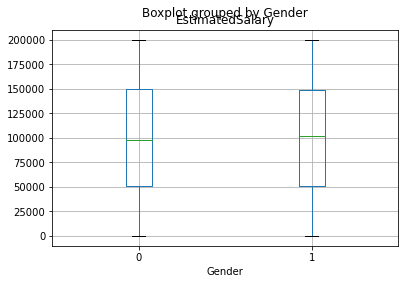

In [69]:
df.boxplot(column='EstimatedSalary',by='Gender')

🛠 Сколько мужчин и женщин являются клиентами банка

🛠 Сколько мужчин имело больше 3 продуктов


🛠 Каковы медиана и стандартное отклонение зарплаты (EstimatedSalary)? Округлите до 2 десятичных знаков.


🛠 Правда ли, что женщины уходят от банка чаще мужчин? Каковы доли в обеих группах?


🛠 Самая популярная фамилия среди клиентов


🛠 Правда ли, что клиенты моложе 30 лет более лояльны, чем клиенты старше 60 лет? Какова доля вышедших из банка в обеих группах?


🛠 Как отличается средний возраст мужчин / женщин в зависимости от страны обслуживания? 


Факультативные тетрадки по [numpy](https://github.com/Yorko/mlcourse.ai/blob/main/jupyter_russian/topic01_pandas_data_analysis/lesson1_part0_numpy.ipynb) и [pandas](https://github.com/Yorko/mlcourse.ai/blob/main/jupyter_russian/topic01_pandas_data_analysis/lesson1_part1_pandas_intro.ipynb)